In [185]:
from numba import jit
import numpy as np
from numba import jit, int32, float32, types, typed
from numba.typed import List
from numba.experimental import jitclass
import matplotlib.pyplot as plt

In [186]:
@jit(nopython=True)
def propagate(particle_id, spheres):
    pos = [0.0, 0.0, 0.0]
    particle_info = []
    direction = [1,1,1]
    
    for i in range(1,10**5): 
        pos_prev = pos
        
        ### change direction ############################################################
        if np.random.random() < 0.1:
            direction[0] = -1*direction[0]
        if np.random.random() < 0.1:
            direction[1] = -1*direction[1]
        if np.random.random() < 0.01:
            direction[2] = -1*direction[2]
            
        ### move in direction ###########################################################
        normalize = (direction[0]**2+direction[1]**2+direction[2]**2)**0.5
        for j in range(3):
            pos[j] = pos[j] + direction[j]/normalize
        r2_prev = pos_prev[0]**2+pos_prev[1]**2+pos_prev[2]**2
        r2 = pos[0]**2+pos[1]**2+pos[2]**2
        
        ### observer ####################################################################
        if i<500 or i%500 == 0:
            particle_info.append([particle_id, i, pos[0], pos[1], pos[2], -1.0])
        for r2_sphere in spheres:
            if r2_prev > r2_sphere and r2 <= r2_sphere or r2_prev < r2_sphere and r2 >= r2_sphere:
                particle_info.append([particle_id, i, pos[0], pos[1], pos[2], r2_sphere*1.0])
        
    return particle_info

In [187]:
@jit(nopython=True)
def many_particles():
    data = [[0.0, 0.0, 0.0, 0.0, -1.0]]
    for i in range(10**3):
        particle_id = i
        data_new = propagate(particle_id, np.array([-1.0]))
        data = data + data_new

    print('finished')
    return data

In [189]:
%time data = many_particles()

finished
Wall time: 16 s


In [190]:
import pandas as pd
df = pd.DataFrame(data[1:])
df.columns = ['id', 't', 'x', 'y', 'z', 'radius']
df

,id,t,x,y,z,radius
0,0.0,1.0,0.577350,0.577350,0.577350,-1.0
1,0.0,2.0,1.154701,1.154701,1.154701,-1.0
2,0.0,3.0,1.732051,1.732051,1.732051,-1.0
3,0.0,4.0,2.309401,2.309401,2.309401,-1.0
4,0.0,5.0,2.886751,2.886751,2.886751,-1.0
...,...,...,...,...,...,...
697995,999.0,97500.0,-565.803264,-344.100760,38.105118,-1.0
697996,999.0,98000.0,-513.841740,-360.266568,72.746134,-1.0
697997,999.0,98500.0,-433.012702,-352.183664,-2.309401,-1.0
697998,999.0,99000.0,-357.957167,-385.669980,-167.431578,-1.0


In [191]:
nr_particles = 100
# remove duplicated elements from list of times 
times = []
[times.append(t) for t in df['t'] if t not in times]
kappa_perp = []
kappa_para = []
for t in times:
    df_t = df.loc[df['t'] ==  t]
    kappa_perp.append(np.mean((df_t['x'].values**2+df_t['y'].values**2))/(4*t))
    kappa_para.append(np.mean(df_t['z'].values**2)/(2*t))
    

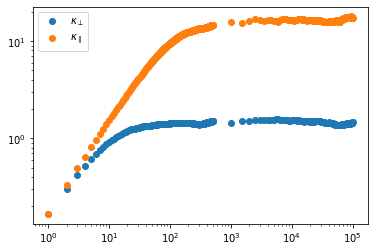

In [192]:
from modules.Plotter import Plotter
import matplotlib.pyplot as plt
plt.scatter(times, kappa_perp, label='$\kappa_\perp$')
plt.scatter(times, kappa_para, label='$\kappa_\parallel$')
plt.legend()
plt.loglog()
plt.show()